In [144]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.spatial
import functools

%matplotlib inline

## 6.2.1

In [145]:
### Kernel function generators
def linear_kernel(X1, X2):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
    Returns:
        matrix of size n1xn2, with x1_i^T x2_j in position i,j
    """
    return np.dot(X1,np.transpose(X2))
 
def RBF_kernel(X1,X2,sigma):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||x1_i-x2_j||^2/(2 sigma^2)) in position i,j
    """
    #TODO
    a = scipy.spatial.distance.cdist(X1, X2, 'sqeuclidean')
    K = np.exp(- a /(2*sigma**2))
    return K

def polynomial_kernel(X1, X2, offset, degree):
    """
    Computes the inhomogeneous polynomial kernel between two sets of vectors
    Args:
        X1 - an n1xd matrix with vectors x1_1,...,x1_n1 in the rows
        X2 - an n2xd matrix with vectors x2_1,...,x2_n2 in the rows
        offset, degree - two parameters for the kernel
    Returns:
        matrix of size n1xn2, with (offset + <x1_i,x2_j>)^degree in position i,j
    """
    #TODO
    return np.power(np.add(np.dot(X1,np.transpose(X2)), offset), degree)


## 6.2.2

In [146]:
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)
linear_kernel(prototypes, prototypes)

array([[16,  4,  0, -8],
       [ 4,  1,  0, -2],
       [ 0,  0,  0,  0],
       [-8, -2,  0,  4]])

## 6.2.3

In [147]:
xpts = np.arange(-5.0, 6, .01).reshape(-1,1)
xpts

array([[-5.  ],
       [-4.99],
       [-4.98],
       ...,
       [ 5.97],
       [ 5.98],
       [ 5.99]])

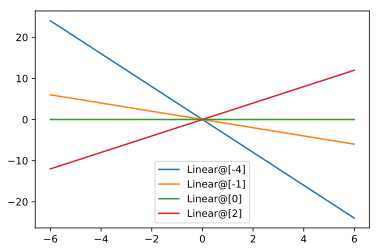

In [148]:
# PLot kernel machine functions
%config InlineBackend.figure_format = 'svg'
plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts) 
for i in range(len(prototypes)):
    label = "Linear@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 
 

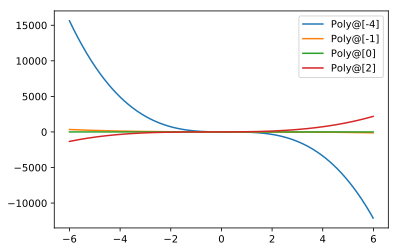

In [149]:
# Poly kernel
y = polynomial_kernel(prototypes, xpts, 1, 3)
for i in range(len(prototypes)):
    label = "Poly@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

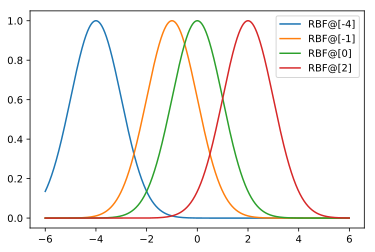

In [150]:
# RBF kernel
y = RBF_kernel(prototypes, xpts, 1)
for i in range(len(prototypes)):
    label = "RBF@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

In [151]:
class Kernel_Machine(object):
    def __init__(self, kernel, prototype_points, weights):
        """
        Args:
            kernel(X1,X2) - a function return the cross-kernel matrix between rows of X1 and rows of X2 for kernel k
            prototype_points - an Rxd matrix with rows mu_1,...,mu_R
            weights - a vector of length R with entries w_1,...,w_R
        """

        self.kernel = kernel
        self.prototype_points = prototype_points
        self.weights = weights
        
    def predict(self, X):
        """
        Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R w_i k(x_j, mu_i)
        """
        # TODO
        k = self.kernel(X,self.prototype_points)
        return np.dot(k,self.weights)

In [152]:
prototypes = np.array([-1,0,1]).reshape(-1,1)
weights = np.array([1,-1,1]).reshape(-1,1)
k = functools.partial(RBF_kernel,sigma = 1)
km = Kernel_Machine(k,prototypes,weights)

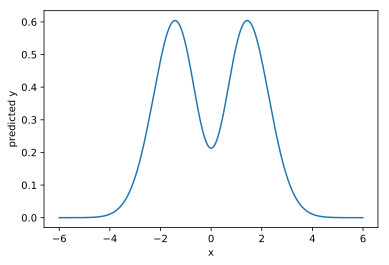

In [153]:
plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
plt.plot(xpts, km.predict(xpts), label=label)
plt.xlabel('x')
plt.ylabel('predicted y')
plt.show() 

## 6.3.1

Load train & test data; Convert to column vectors so it generalizes well to data in higher dimensions.

In [154]:
data_train,data_test = np.loadtxt("krr-train.txt"),np.loadtxt("krr-test.txt")
x_train, y_train = data_train[:,0].reshape(-1,1),data_train[:,1].reshape(-1,1)
x_test, y_test = data_test[:,0].reshape(-1,1),data_test[:,1].reshape(-1,1)

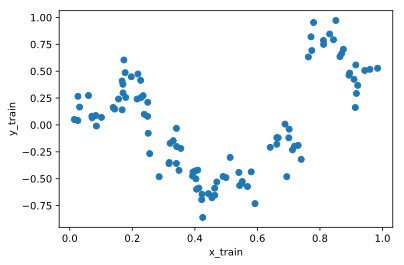

In [155]:
plt.plot(x_train,y_train,'o')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.show()

## 6.3.2

In [156]:
def train_kernel_ridge_regression(X, y, kernel, l2reg):
    # TODO
    dim = X.shape[0]
    alpha = np.dot(np.linalg.inv(l2reg * np.identity(dim) + kernel(X,X)),y)
    return Kernel_Machine(kernel, X, alpha)

## 6.3.3
- From the graph below, we can see that: sigma=0.01 is more likely to over fit while sigma =1 is less.

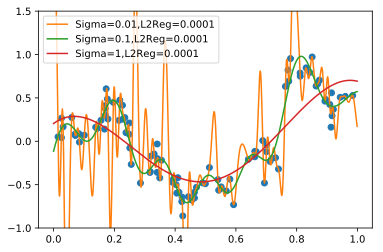

In [157]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
l2reg = 0.0001
for sigma in [.01,.1,1]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

## 6.3.4
- When $\lambda \rightarrow \infty$ , the prediction function becomes a constant(looking like a straight line y=0 from the figure)

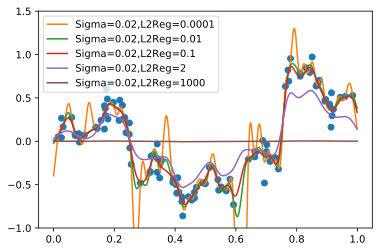

In [158]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
sigma= .02
for l2reg in [.0001,.01,.1,2,1000]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

## 6.3.5

In [159]:
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelRidgeRegression(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return(((self.predict(X)-y)**2).mean()) 

In [160]:
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error,make_scorer
import pandas as pd
    
test_fold = [-1]*len(x_train) + [0]*len(x_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)

In [191]:
param_grid = [{'kernel': ['RBF'],'sigma':[0.02,0.04,0.05,0.06,0.07,0.1,0.5], 'l2reg': np.exp2(-np.arange(-1,5,0.1))},
              {'kernel':['polynomial'],'offset':np.arange(-5,5,0.5), 'degree':np.arange(2,10,1),'l2reg':np.exp2(-np.arange(-2,6,0.5)) },
              {'kernel':['linear'],'l2reg': [10,5,4,3,2,1,0.1,.01,0.005]}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False)
                  # n_jobs = -1  #should allow parallelism, but crashes Python on my machine
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=KernelRidgeRegression(degree=2, kernel='RBF', l2reg=1, offset=1, sigma=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['RBF'], 'sigma': [0.02, 0.04, 0.05, 0.06, 0.07, 0.1, 0.5], 'l2reg': array([2.     , 1.86607, 1.7411 , 1.6245 , 1.51572, 1.41421, 1.31951,
       1.23114, 1.1487 , 1.07177, 1.     , 0.93303, 0.87055, 0.81225,
       0.75786, 0.70711, 0.65975, 0.61557, 0.57435, 0.53589, 0.5    ...
       0.03125, 0.0221 ])}, {'kernel': ['linear'], 'l2reg': [10, 5, 4, 3, 2, 1, 0.1, 0.01, 0.005]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [192]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset","param_sigma",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["mean_test_score"])

/Users/jr/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/jr/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/jr/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
248,-,RBF,0.176777,-,0.06,0.013805,0.014446
255,-,RBF,0.164938,-,0.06,0.013808,0.014337
241,-,RBF,0.189465,-,0.06,0.013810,0.014562
262,-,RBF,0.153893,-,0.06,0.013819,0.014233
234,-,RBF,0.203063,-,0.06,0.013824,0.014686
269,-,RBF,0.143587,-,0.06,0.013838,0.014136
361,-,RBF,0.058315,-,0.07,0.013843,0.014489
368,-,RBF,0.054409,-,0.07,0.013845,0.014409
227,-,RBF,0.217638,-,0.06,0.013847,0.014817
354,-,RBF,0.062500,-,0.07,0.013847,0.014575


In [193]:
# Can be a more convenient way to look at the table
import qgrid 
# qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folderd_toshow = df[show].fillna('-')
q = qgrid.show_grid(df_toshow,show_toolbar=True)
q

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

- 1. Linear kernel

In [177]:
q.get_changed_df()

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
5822,-,linear,4.000,-,-,0.164510,0.206563
5823,-,linear,3.000,-,-,0.164512,0.206538
5821,-,linear,5.000,-,-,0.164513,0.206592
5824,-,linear,2.000,-,-,0.164522,0.206518
5825,-,linear,1.000,-,-,0.164540,0.206506
5826,-,linear,0.100,-,-,0.164565,0.206501
5827,-,linear,0.010,-,-,0.164569,0.206501
5828,-,linear,0.005,-,-,0.164569,0.206501
5820,-,linear,10.000,-,-,0.164591,0.206780


- 2. RBF kernel
<br>(the best RBF: l2reg = 0.176777, sigma = 0.06)

In [176]:
q.get_changed_df()

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
248,-,RBF,0.176777,-,0.06,0.013805,0.014446
255,-,RBF,0.164938,-,0.06,0.013808,0.014337
241,-,RBF,0.189465,-,0.06,0.013810,0.014562
262,-,RBF,0.153893,-,0.06,0.013819,0.014233
234,-,RBF,0.203063,-,0.06,0.013824,0.014686
269,-,RBF,0.143587,-,0.06,0.013838,0.014136
361,-,RBF,0.058315,-,0.07,0.013843,0.014489
368,-,RBF,0.054409,-,0.07,0.013845,0.014409
227,-,RBF,0.217638,-,0.06,0.013847,0.014817
354,-,RBF,0.062500,-,0.07,0.013847,0.014575


- 3. Polynomial Kernel
<br>(the best Poly: degree =9, l2reg = 0.022097, offset = -4.5)

In [194]:
q.get_changed_df()

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
2961,9,polynomial,0.022097,-4.5,-,0.030362,0.040158
2940,9,polynomial,0.031250,-5,-,0.030418,0.040295
2960,9,polynomial,0.022097,-5,-,0.030488,0.039725
2962,9,polynomial,0.022097,-4,-,0.031091,0.041698
2941,9,polynomial,0.031250,-4.5,-,0.031362,0.041928
2920,9,polynomial,0.044194,-5,-,0.032005,0.042569
1974,6,polynomial,0.044194,2,-,0.032416,0.048621
2013,6,polynomial,0.022097,1.5,-,0.032440,0.048233
1955,6,polynomial,0.062500,2.5,-,0.032487,0.047561
2136,7,polynomial,0.707107,3,-,0.032550,0.047654


## 6.3.6
 __Answer__: it seems that the RBF kernel fits data better(it captures more twist in the curve), and the polynomial kernel seems to be more general.

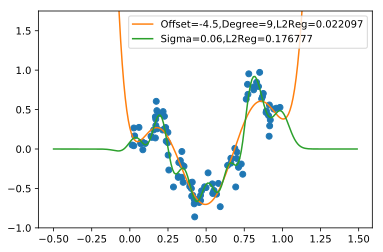

In [196]:
## Plot the best polynomial and RBF fits you found
plot_step = .01
xpts = np.arange(-.5 , 1.5, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
#Plot best polynomial fit
offset= -4.5
degree = 9
l2reg = 0.022097
k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
#Plot best RBF fit
sigma = 0.06
l2reg= 0.176777
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.75)
plt.show()

## 6.3.7
- from hw1, we know that the bayes decision function for square loss is: $E(y|x) = E(f(x)+\epsilon|x) = f(x)$
- from hw1, we know that the bayes risk for square loss is: $Var(y) = Var(f(x)+\epsilon) = Var(f(x)) + Var(\epsilon) = 0.01$

## 6.4.1
-__Answer__: not linearly separable,not quadratically separable. we can use some RBF kernel to separate the data properly.

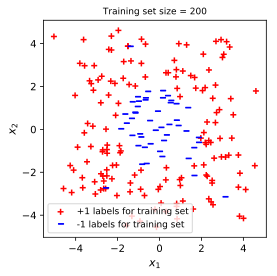

In [197]:
# Load and plot the SVM data
#load the training and test sets
data_train,data_test = np.loadtxt("svm-train.txt"),np.loadtxt("svm-test.txt")
x_train, y_train = data_train[:,0:2], data_train[:,2].reshape(-1,1)
x_test, y_test = data_test[:,0:2], data_test[:,2].reshape(-1,1)

#determine predictions for the training set
yplus = np.ma.masked_where(y_train[:,0]<=0, y_train[:,0])
xplus = x_train[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_train[:,0]>0, y_train[:,0])
xminus = x_train[~np.array(yminus.mask)]

#plot the predictions for the training set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 

pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 labels for training set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 labels for training set')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

In [ ]:
def train_soft_svm(x_train, y_train, k, ...):
    

In [23]:
# Code to help plot the decision regions
# (Note: This ode isn't necessarily entirely appropriate for the questions asked. So think about what you are doing.)
 
sigma=1
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_soft_svm(x_train, y_train, k, ...)

#determine the decision regions for the predictions
x1_min = min(x_test[:,0])
x1_max= max(x_test[:,0])
x2_min = min(x_test[:,1])
x2_max= max(x_test[:,1])
h=0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

Z = f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#determine the predictions for the test set
y_bar = f.predict (x_test) 
yplus = np.ma.masked_where(y_bar<=0, y_bar)
xplus = x_test[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_bar>0, y_bar)
xminus = x_test[~np.array(yminus.mask)]

#plot the learned boundary and the predictions for the test set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 
decision =ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='b', label = '+1 prediction for test set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 prediction for test set')
ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('SVM with RBF Kernel: training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

NameError: name 'train_soft_svm' is not defined